# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np

df = pd.read_csv('heart.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Splitting the data into train-test sets.

In [2]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, random_state=13)

# Decision Tree Classifier

## Training a Decision Tree Classifier.

In [3]:
dt_classifier = sk.tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

## Visualizing the Decision Tree.

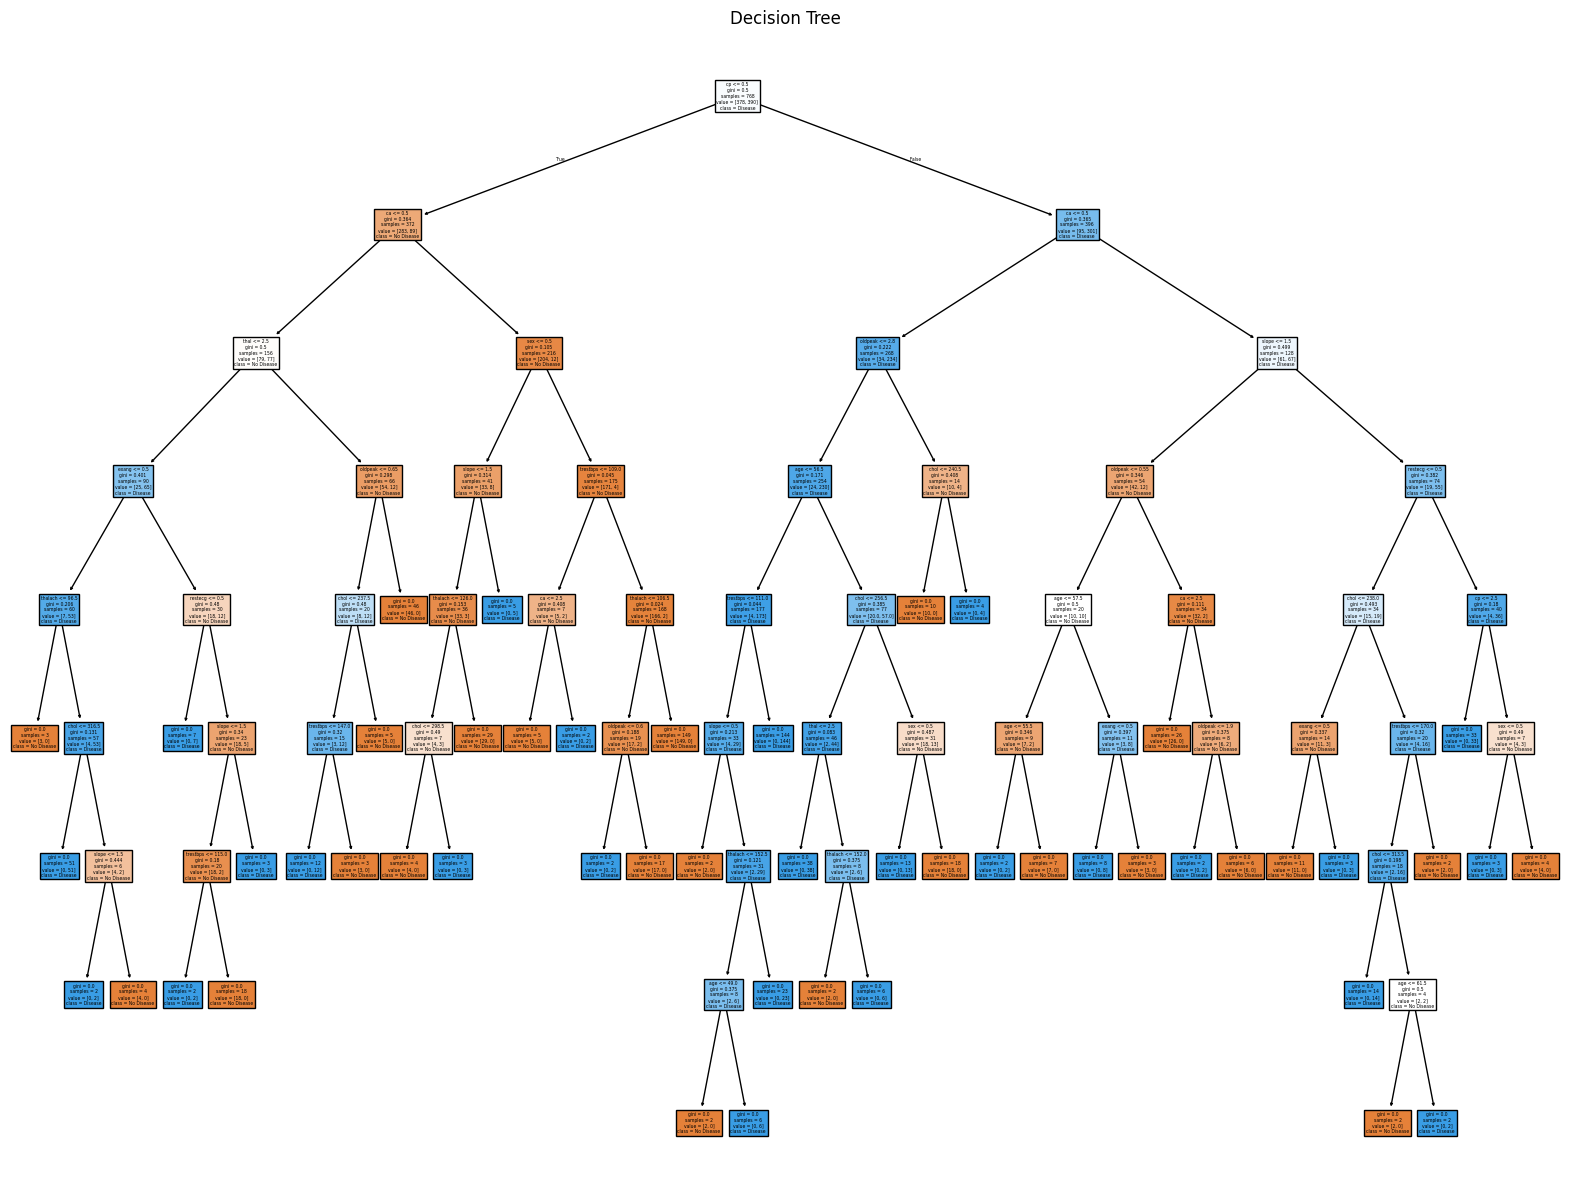

In [4]:
plt.figure(figsize=(20, 15))
sk.tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title('Decision Tree')
plt.show()

## Model Evaluation.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For training data
y_pred_train = dt_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

print("For Traing Data:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score: ", f1_score_train)

# For testing data
y_pred_test = dt_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

print("\nFor Testing Data:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score: ", f1_score_test)


For Traing Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score:  1.0

For Testing Data:
Accuracy: 0.9883268482490273
Precision: 0.9784172661870504
Recall: 1.0
F1-score:  0.9890909090909091


Since, Training Accuracy - Testing Accuracy < 0.1, there is a small chance of overfitting.

## Model Optimization.

Optimal value for max_depth: 8


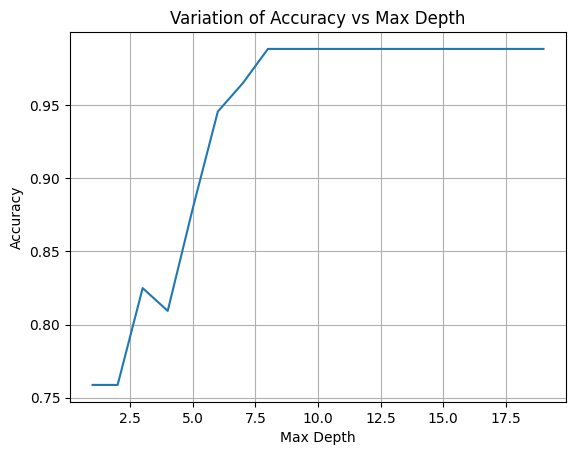

In [6]:
# Optimizing the Decision Tree Accuracy by varying the max_depth parameter.

max_depths = list(range(1, 20))
accuracy_scores = []

# Calculating accuracy score of the model for each value of max_depths
for max_depth in max_depths:
    dtc = sk.tree.DecisionTreeClassifier(max_depth=max_depth, random_state=13)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Finding the optimal value for max_depth
opt_max_depth = max_depths[np.argmax(accuracy_scores)]
print("Optimal value for max_depth:", opt_max_depth)

# Visualizing the variation of accuracy of the model vs max_depth
plt.plot(max_depths, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy vs Max Depth')
plt.grid()
plt.show()

In [7]:
# Retraining the Model with max_depth=8
opt_dt_classifier = sk.tree.DecisionTreeClassifier(max_depth=8)
opt_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

# Random Forest.

## Training a Random Forest

In [8]:
rf_classifier = sk.ensemble.RandomForestClassifier(random_state=13)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=13)

## Model Evaluation.

In [9]:
# Predictions using the model

rf_preds = rf_classifier.predict(X_test)
dt_preds = opt_dt_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1_score = f1_score(y_test, dt_preds)

# Comparision Tabele
comparision_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [rf_accuracy, dt_accuracy],
    'Precision': [rf_precision, dt_precision],
    'Recall': [rf_recall, dt_recall],
    'F1-score': [rf_f1_score, dt_f1_score]
})

display(comparision_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.976654,0.977941,0.977941,0.977941
1,Decision Tree,0.976654,0.957746,1.000000,0.978417


## Feature Importance from the trained Random Forest.

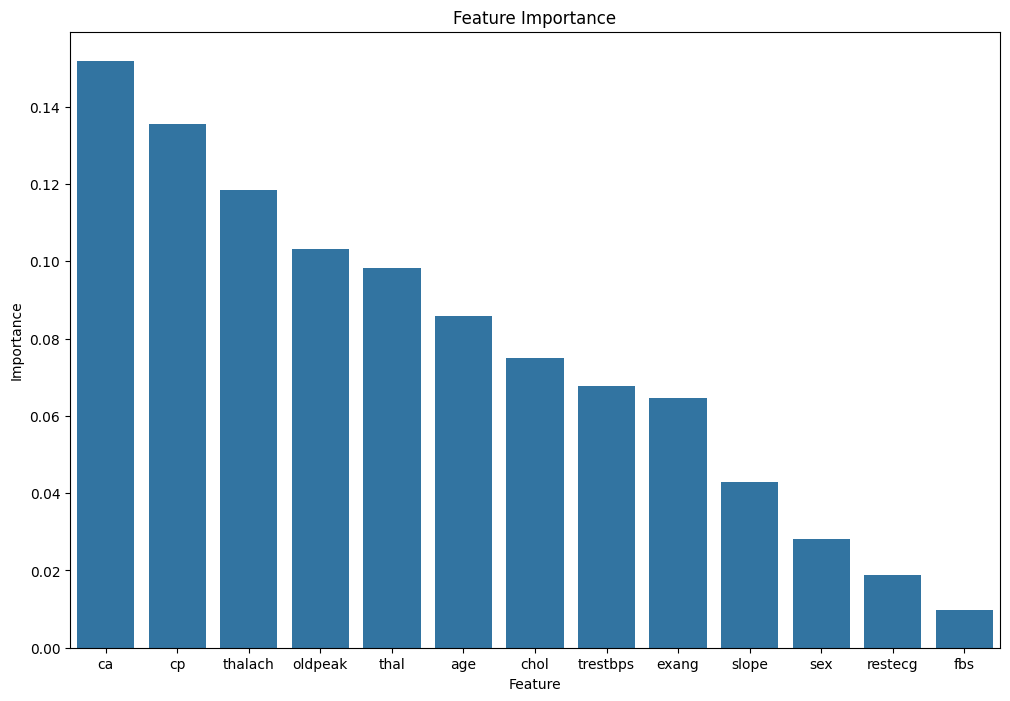

In [10]:
feature_imp = rf_classifier.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_imp})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', data=feature_imp_df)
plt.title('Feature Importance')
plt.show()

# Evaluation using Cross-validation.

In [11]:
# Calculating cross validation scores on both models.

dt_cvs = sk.model_selection.cross_val_score(opt_dt_classifier, X, y, cv=5)
rf_cvs = sk.model_selection.cross_val_score(rf_classifier, X, y, cv=5)

print(f"Decision Tree mean cross-validation score: {dt_cvs.mean():.4f}")
print(f"Random Forest mean cross-validation score: {rf_cvs.mean():.4f}")


Decision Tree mean cross-validation score: 0.9844
Random Forest mean cross-validation score: 0.9971
